### Building a Mechine learning Model to Predict Titanic Disaster Servivers  
- Understand the Dataset & cleanup (if required).
- Build a strong classification model to predict whether the passenger survives or not.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

**1. PassengerId**
- Purpose: Unique identifier for each passenger.
    - Notes: No predictive value itself (random ID), but useful for tracking records.

**2. Survived**
- Purpose: Target variable — indicates survival outcome.

- Values:
    - 0 = Did not survive
    - 1 = Survived

- Role in ML: The label we try to predict in supervised learning.

**3. Pclass (Passenger Class)**
- Purpose: Socio-economic class of the passenger.

- Values:
    - 1 = Upper class (luxury cabins)
    - 2 = Middle class
    - 3 = Lower class

- Impact: Often correlated with survival (higher class had better access to lifeboats).

**4. Name**
- Purpose: Passenger’s full name.

- Usage in ML: Usually split into:
    - Title extraction (Mr, Mrs, Miss, Master) — useful feature for gender/age grouping.
    - Full name itself is not predictive but contains embedded information (social status, family relations).

**5. Sex**
- Purpose: Passenger gender.

- Values: male / female

- Impact: Gender strongly influenced survival rates (women and children prioritized).

**6. Age**
- Purpose: Passenger age in years.

- Impact: Younger passengers (especially children) had higher survival rates.

- Notes: Missing values are present and must be handled before training.

**7. SibSp (Siblings/Spouses Aboard)**
- Purpose: Number of siblings or spouses aboard the Titanic.

- Impact: Indicates family size; small families sometimes had better chances due to mutual aid.

**8. Parch (Parents/Children Aboard)**
- Purpose: Number of parents or children aboard.

- Impact: Another family size indicator; combined with SibSp can create a FamilySize feature.

**9. Ticket**
- Purpose: Ticket number assigned to the passenger.

- Notes:
    - Not directly predictive, but ticket prefixes can indicate travel groups or cabin proximity.
    - Can be processed for group size inference.

**10. Fare**
- Purpose: Amount paid for the ticket.

- Impact: Higher fares often correlate with higher class (Pclass) and survival rate.

**11. Cabin**
- Purpose: Cabin number where the passenger stayed.

- Notes:
    - Missing for many passengers.
    - First letter indicates deck location (e.g., C85 → Deck C).

- Deck proximity can influence survival (lifeboat access).

**12. Embarked**
- Purpose: Port of embarkation (where passenger boarded).

- Values:
    - C = Cherbourg (France)
    - Q = Queenstown (Ireland)
    - S = Southampton (England)
- Impact: Port can correlate with socio-economic background and fare.

In [194]:
# import Nessosery Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [114]:
titanic_df = pd.read_csv("Data/Titanic-Dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [117]:
# There is no use for Passenger Id in the data 
titanic_df = titanic_df.drop('PassengerId', axis=1)

Dataset hase **missing values** and the **strings** in it we need to work on it before the **exploretory data analysis**.

In [118]:
# The Passenger names are Ex : Braund, Mr. Owen Harris and the models can't undestand the strings in the datset
# we need to make it that the models can undestand 
# and the full names of the passenger it not usefull for the model training 
# but the titles of the passengers : Mr, Miss, Mrs, Master are crutual for model to undestand the servival rete of each passenger
# we need to extract them and add them back to the main DataFrame
# in the dataset the titles are between first coma and fullstop, 
# we can get the title by using that 

# work with Lambda to extract the titles 
titanic_df["Title"] = titanic_df["Name"].apply(lambda x : x.split(',')[1].split('.')[0].strip())
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [119]:
titanic_df = titanic_df.drop("Name", axis=1)

In [120]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [121]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [122]:
# because of high missing values in the Cabin feature i am droping the column 
# it hase 71 % of missing values
titanic_df = titanic_df.drop("Cabin", axis=1) 

In [123]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [124]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Title         0
dtype: int64

In [125]:
# The Ticket feature hase almost 600 different values it will couse some issues with the model acuracy 
# so i am droping the Ticket feature 
titanic_df = titanic_df.drop("Ticket", axis=1)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [126]:
# Transform the Sex Feature to a int from object 

titanic_df['Sex'], _ = pd.factorize(titanic_df['Sex'])
titanic_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Rev
887,1,1,1,19.0,0,0,30.0000,S,Miss
888,0,3,1,NaN,1,2,23.4500,S,Miss
889,1,1,0,26.0,0,0,30.0000,C,Mr


In [127]:
# Transform Title feature column
titanic_df['Title'], _ = pd.factorize(titanic_df['Title'])
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,0


In [128]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [42]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
dtype: int64

In [129]:
titanic_df['Age'].isna().groupby(titanic_df['Survived']).sum()

Survived
0    125
1     52
Name: Age, dtype: int64

In [130]:
titanic_df['Survived'].groupby(titanic_df['Embarked']).sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

In [131]:
# Filling the age features accorgin to Passenger title
titanic_df['Age'] = titanic_df.groupby('Title')['Age'].transform(
    lambda x: x.fillna(x.median())
)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


In [132]:
# fill the embarked missing value
titanic_df.loc[titanic_df['Embarked'].isna(), 'Embarked'] = 'C'

In [133]:
titanic_df['Embarked'], _ = pd.factorize(titanic_df['Embarked'])

In [134]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

Let's work with the data to undestand about it

In [135]:
# chack duplicates
data = titanic_df.drop_duplicates(subset= "Survived")
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1


In [136]:
titanic_df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [137]:
titanic_df['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [138]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [139]:
titanic_data_correlation = titanic_df.corr()

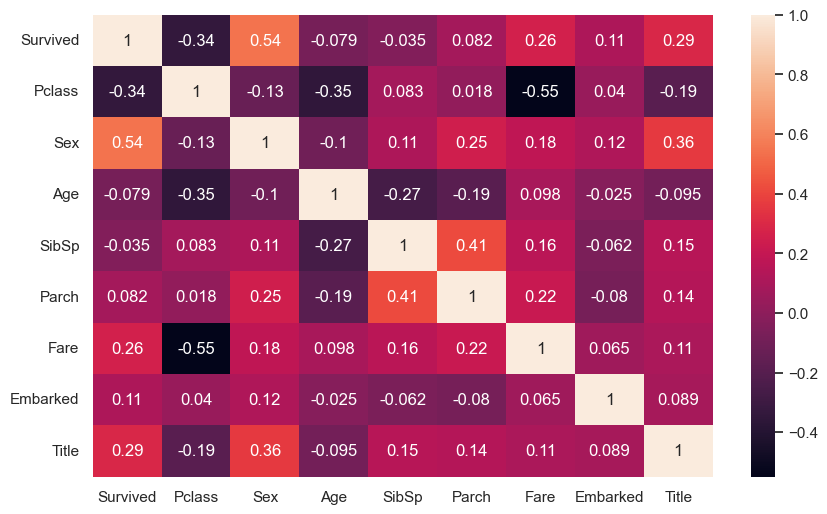

In [140]:
# Heatmap for titanic dataset correlation 
plt.subplots(figsize = (10, 6))
sns.heatmap(titanic_data_correlation, annot=True,);

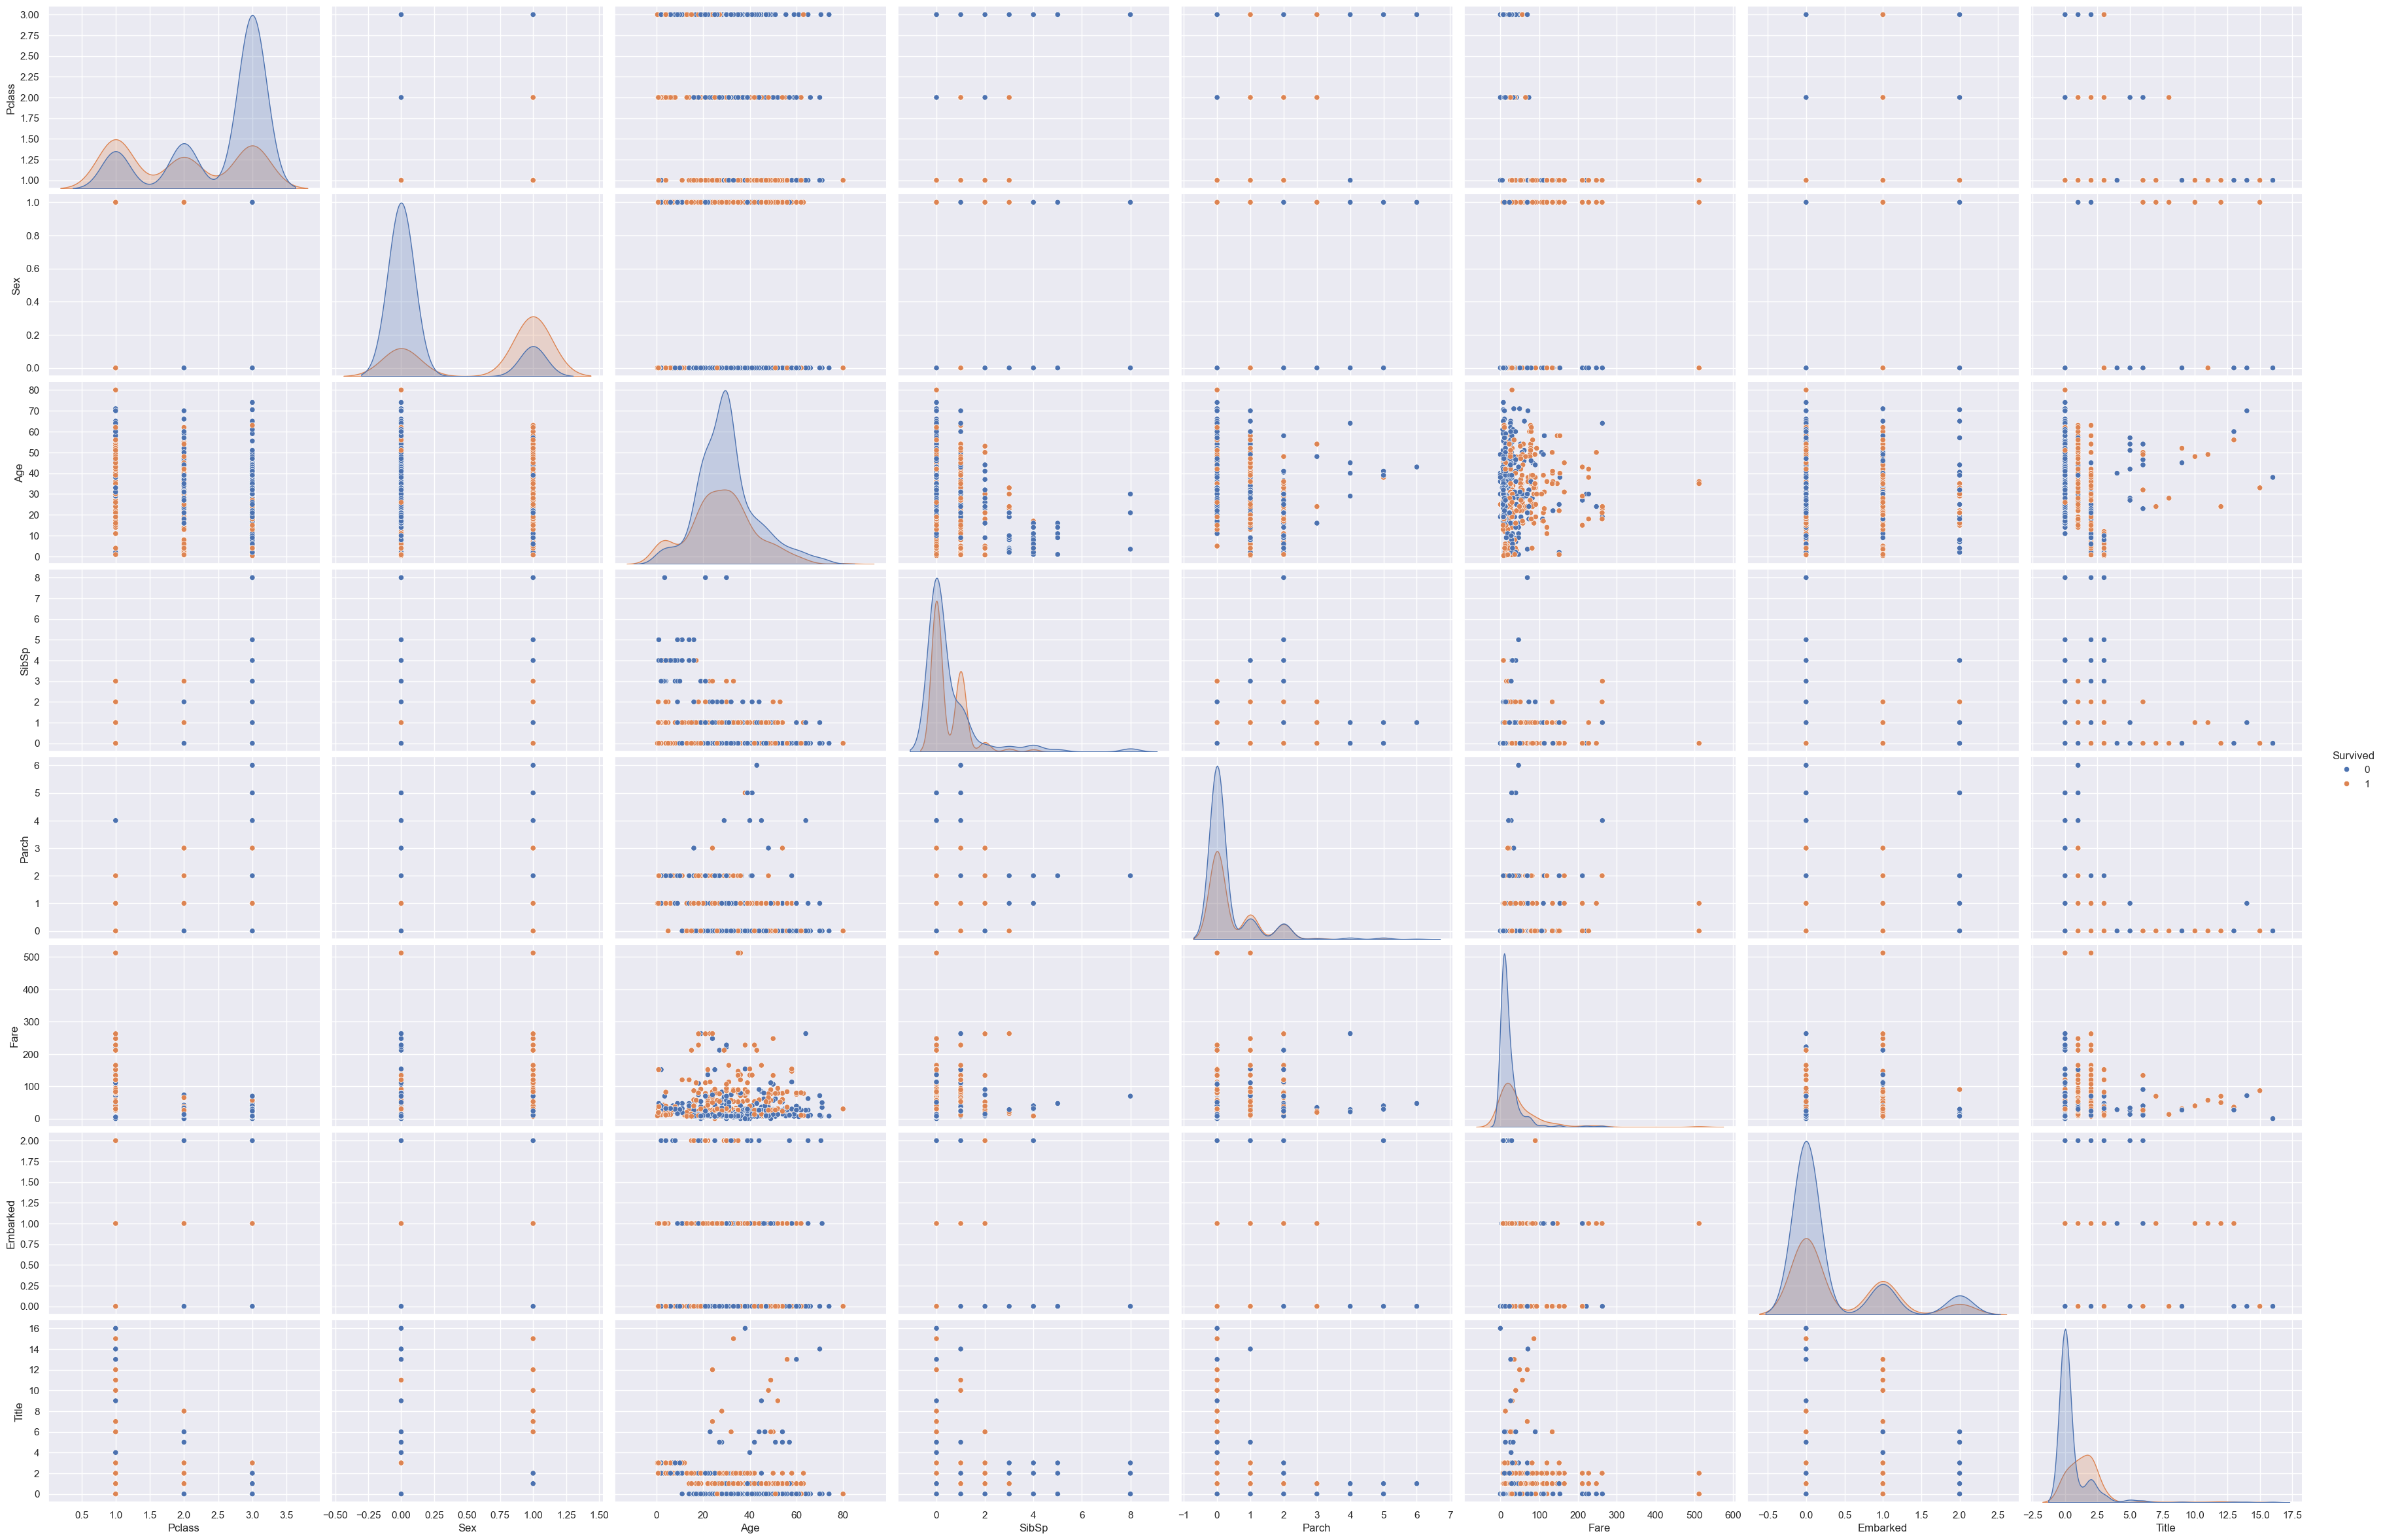

In [141]:
titanic_plots = sns.pairplot(titanic_df, hue="Survived", height=3, aspect=1.5)

In [142]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,5
887,1,1,1,19.0,0,0,30.0000,0,2
888,0,3,1,21.0,1,2,23.4500,0,2
889,1,1,0,26.0,0,0,30.0000,1,0


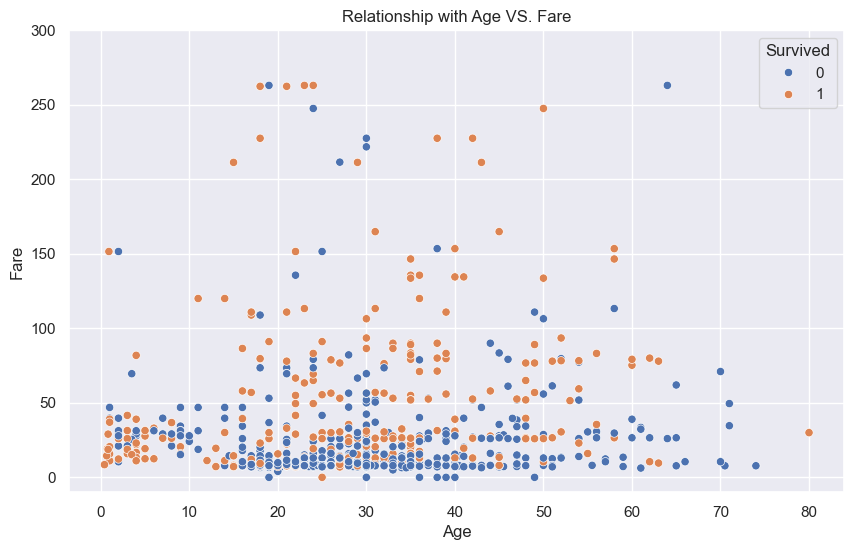

In [143]:
plt.subplots(figsize=(10,6))
sns.scatterplot(x="Age", y="Fare", data=titanic_df, hue="Survived");
plt.title("Relationship with Age VS. Fare")
plt.ylim(-10,300);

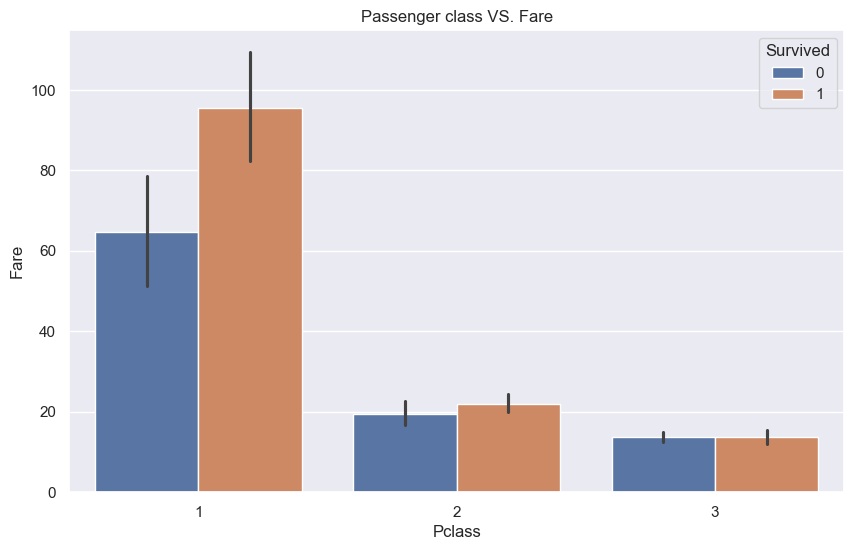

In [105]:
plt.subplots(figsize=(10, 6))
sns.barplot(data=titanic_df, x="Pclass", y="Fare", hue="Survived")
plt.title("Passenger class VS. Fare");

In [144]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,5
887,1,1,1,19.0,0,0,30.0000,0,2
888,0,3,1,21.0,1,2,23.4500,0,2
889,1,1,0,26.0,0,0,30.0000,1,0


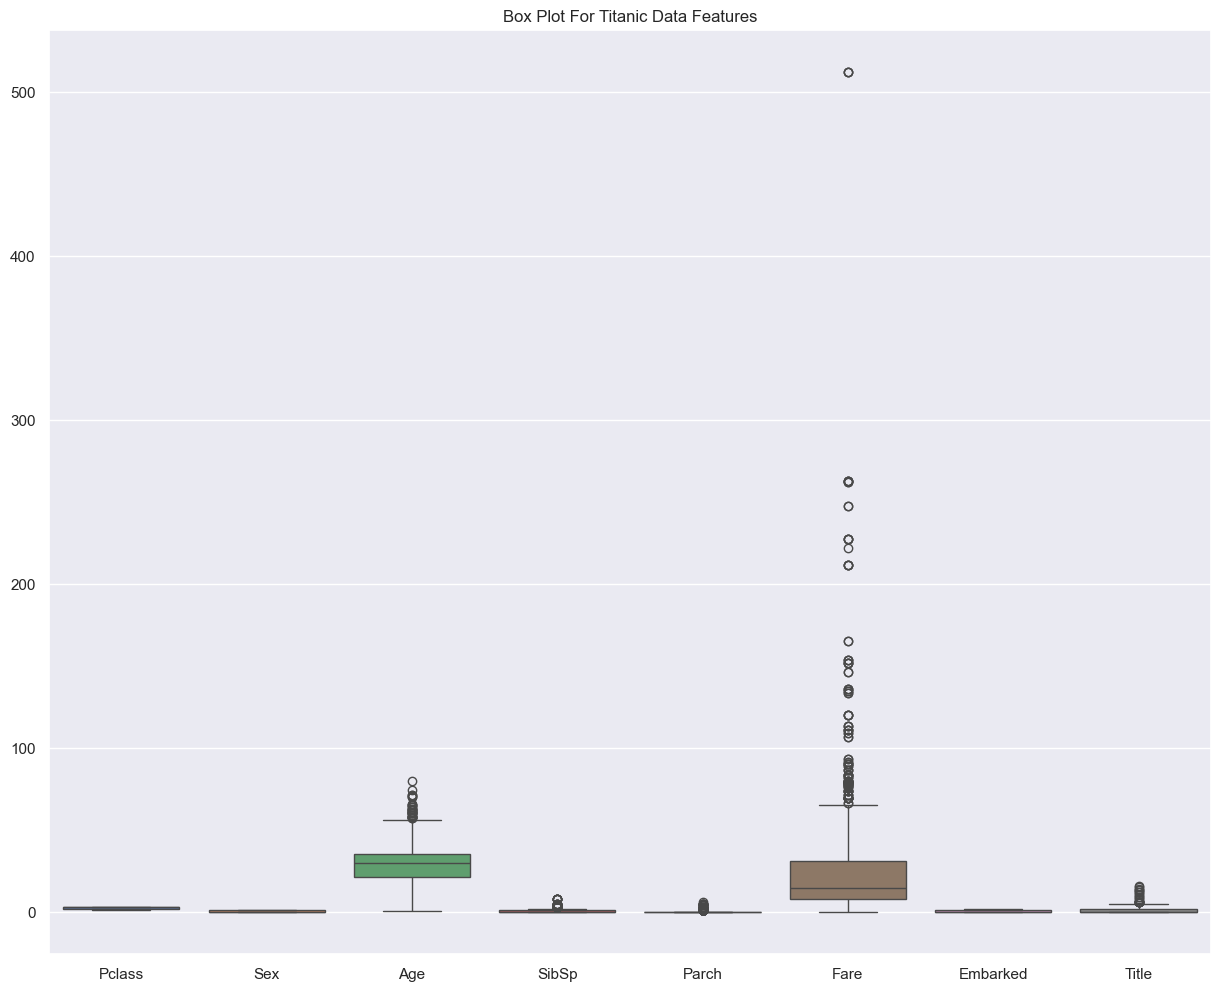

In [145]:
# Find is there any outliers
plt.subplots(figsize=(15, 12))
sns.boxplot(data=titanic_df.drop('Survived', axis=1))
plt.title("Box Plot For Titanic Data Features")
plt.show();

In the data even it hase outliers in most of the column they have impact in the model pradiction so we won't delete them 

### Modeling

In [177]:
# Random seed
np.random.seed(42)

# Split the data into Features and Labels
x = titanic_df.drop("Survived", axis=1)
y = titanic_df['Survived']

# training & testting split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)

models = {  "LogisticRegression": LogisticRegression(),
            "SVM" : SVC(),
            "RandomForest": RandomForestClassifier()}

scaler = StandardScaler()

test_scores = {}
crossv_scores = {}
    
for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", scaler),
        ("model", model)
    ])
    
    # Final test set evaluation
    pipeline.fit(x_train, y_train)
    test_score = pipeline.score(x_test, y_test)
    print(f"{name} Test Accuracy: {test_score:.4f}")
    test_scores[name] = test_score
    
    
    # Cross validation scores
    crossv_score = cross_val_score(pipeline, x_train, y_train)
    print(f"{name} CV Accuracy: {crossv_score.mean():.4f} ± {crossv_score.std():.4f}")
    print("-" * 50)
    crossv_scores[name] = crossv_score.mean()

LogisticRegression Test Accuracy: 0.8045
LogisticRegression CV Accuracy: 0.7935 ± 0.0366
--------------------------------------------------
SVM Test Accuracy: 0.8268
SVM CV Accuracy: 0.8286 ± 0.0209
--------------------------------------------------
RandomForest Test Accuracy: 0.8268
RandomForest CV Accuracy: 0.8076 ± 0.0130
--------------------------------------------------


In [170]:
print(type(test_score))

<class 'float'>


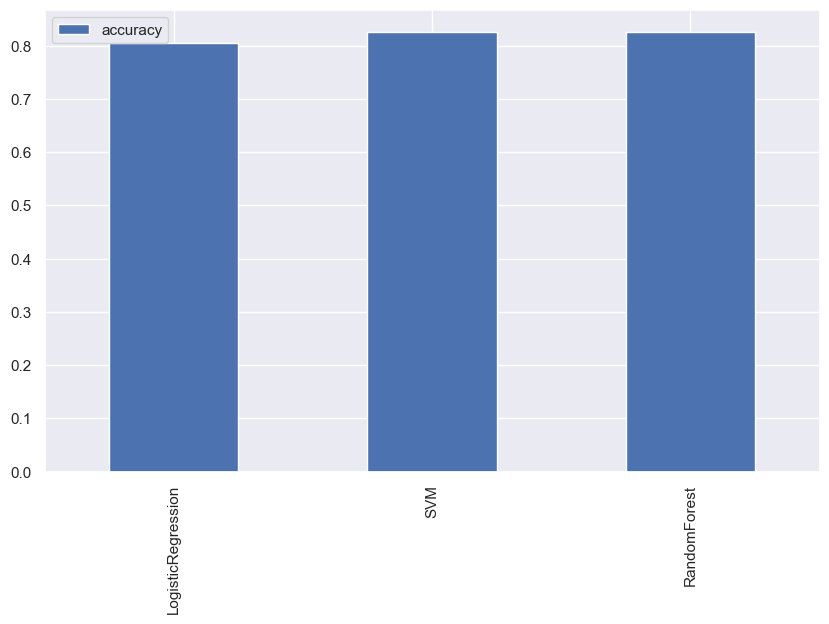

In [185]:
# Model Comperison 
Model_comper = pd.DataFrame(test_scores, index=["accuracy"])
Model_comper.T.plot.bar(figsize=(10,6));

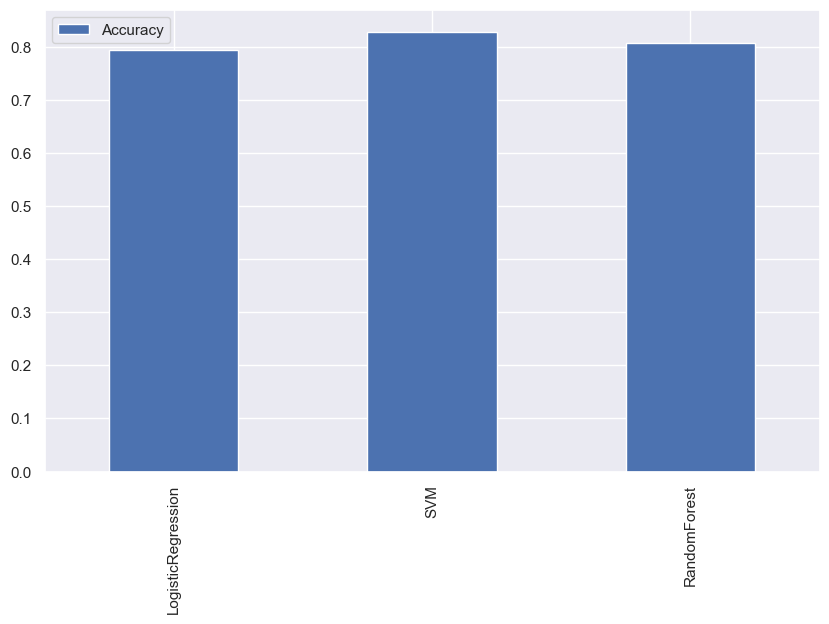

In [184]:
Model_comper_cross_val = pd.DataFrame(crossv_scores, index=['Accuracy'])
Model_comper_cross_val.T.plot.bar(figsize=(10,6));

After Corss Validation SVM model has higher score 
- I am choosing the SVM model for more Fine tuning 

In [190]:
# Make a Classification report 
SVM = SVC()
SVM.fit(x_train, y_train)
y_preds = SVM.predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [192]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [193]:
SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

RandomizedSearchCV